#Problématique :
Compte tenu des paramètres cliniques d'un patient, peut-on prédire s'il a ou non une maladie cardiaque ?

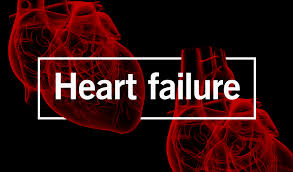

In [13]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import matplotlib # collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os
#print(os.getcwd())

Python version: 3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
NumPy version: 1.21.2
pandas version: 1.3.4
matplotlib version: 3.4.3


In [18]:
#on importe notre dataset depuis github
df = pd.read_csv('https://raw.githubusercontent.com/QYTZER/ML-BIOMSCS/main/heart.csv')
df.shape

(303, 14)

In [17]:

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [34]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

In [35]:
print(disease,no_disease)
#On a 165 personnes atteintes d'une maladie cardiaque et 138 personnes saines

165 138


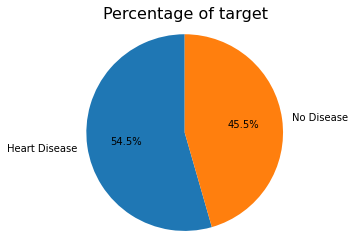

In [36]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:


In [37]:
#on vérifie si on a des valeurs manquantes
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [38]:
#On teste si les variables sont quantitatives ou catégorielles
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [22]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [24]:
quantitative

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

(14.5, -0.5)

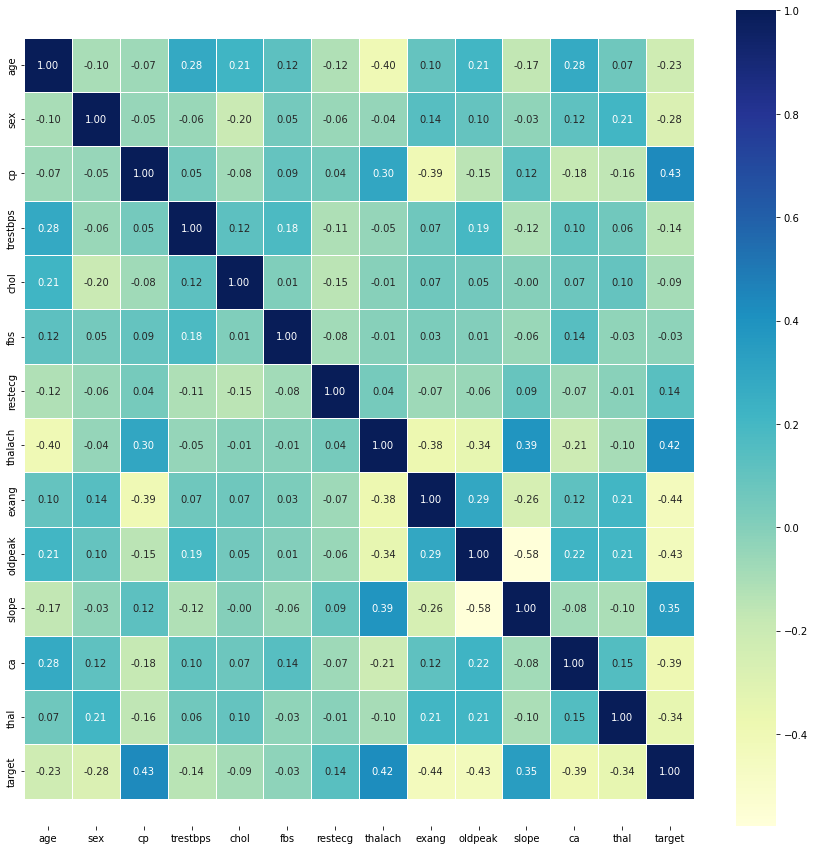

In [8]:
#on affiche notre matrice de corrélation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [23]:
#notre colonne cible qu'on veut prédire c'est la colonne target
X = df.drop('target',1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (303, 13) (303,)


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [25]:
from sklearn.model_selection import train_test_split
#on split notre dataset en données de test et d'entrainement (test=30% de l'ensemble du dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (212, 13) (212,)
shape of X and y respectively (test) : (91, 13) (91,)


On essaye un modele de regression logistique

In [26]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.882353    0.850394  0.863208    0.866373      0.864564
recall      0.797872    0.915254  0.863208    0.856563      0.863208
f1-score    0.837989    0.881633  0.863208    0.859811      0.862281
support    94.000000  118.000000  0.863208  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 75  19]
 [ 10 108]]

Test Result:
Accuracy Score: 80.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.842105   0.773585  0.802198   0.807845      0.806716
recall      0.727273   0.872340  0.802198   0.799807      0.802198
f1-score    0.780488   0.820000  0.802198   0.800244      0.800895
support    44.000000  47.000000  0.802198  91.000000     91.000000
_____________

In [27]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.320755,80.21978


On essaye maintenant un modele d'arbre de décision

In [28]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    94.0  118.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 94   0]
 [  0 118]]

Test Result:
Accuracy Score: 73.63%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.717391   0.755556  0.736264   0.736473      0.737103
recall      0.750000   0.723404  0.736264   0.736702      0.736264
f1-score    0.733333   0.739130  0.736264   0.736232      0.736327
support    44.000000  47.000000  0.736264  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [29]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.320755,80.219780
1,Decision Tree Classifier,100.000000,73.626374


In [44]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # Il s'agit du nombre d'arbres que nous souhaitons construire
#avant de prendre le maximum de votes ou de moyennes de prédictions. Un nombre plus élevé d'arbres nous donne de 
#meilleures performances mais ralentit l'éxécution de notre code
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
#print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% des gens prédits avec une maladie du coeur:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))
print()
#on a un bon score de testing=85% 
#on compare avec le début : on trouve que le % de personnes malade est 56.04% et le resultat de notre prédiction est 57%

RandomForestClassifier
Training Score: 1.0
Testing Score: 0.8461538461538461
% des gens prédits avec une maladie du coeur: 0.5604395604395604
              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.82      0.89      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91




In [53]:
X_train2= pd.DataFrame(X_train)
X_train2.columns=['Age', 'Gender', 'CP', 'Trestbps', 'Chol', 'FBS', 'RestECG',
                 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal']
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train2.columns,
                                  columns=['importance']).sort_values('importance',ascending=False)

feature_importances[['importance']]*100
#Le pourcentage de la contribution de chaque variable dans notre modele

,importance
Thal,12.252650
Thalach,12.153290
CP,12.104933
Oldpeak,11.946642
CA,10.851556
Age,7.752176
Chol,7.613994
Trestbps,6.686260
Exang,6.192879
Slope,5.628876


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    94.0  118.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 94   0]
 [  0 118]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.891892   0.796296  0.835165   0.844094      0.842518
recall      0.750000   0.914894  0.835165   0.832447      0.835165
f1-score    0.814815   0.851485  0.835165   0.833150      0.833754
support    44.000000  47.000000  0.835165  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [31]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.320755,80.219780
1,Decision Tree Classifier,100.000000,73.626374
2,Random Forest Classifier,100.000000,83.516484


On va maintenant tuner nos parametres pour le random forest en lançant  un gridsearch

In [40]:

n_estimators = [50,150,125,75]
max_features = ['auto', 'sqrt']
max_depth = [2, 3,4]
#max_depth = [2, 3, 5, 10, 15, None]
#min_samples_split = [2, 5, 10]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]
bootstrap= [True,False]
params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters: {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Train Result:
Accuracy Score: 89.15%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.917647    0.874016  0.891509    0.895831      0.893362
recall      0.829787    0.940678  0.891509    0.885233      0.891509
f1-score    0.871508    0.906122  0.891509    0.888815      0.890775
support    94.000000  118.000000  0.891509  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 78  16]
 [  7 111]]

Test Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.885714   0.767857  0.813187   0.826786      0.824843
recall      0.704545   0.

In [41]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.320755,80.219780
1,Decision Tree Classifier,100.000000,73.626374
2,Random Forest Classifier,100.000000,83.516484
3,Tuned Random Forest Classifier,88.679245,82.417582
4,Tuned Random Forest Classifier,88.207547,81.318681
5,Tuned Random Forest Classifier,89.150943,81.318681
